In [59]:
#Imports
from pytrends.request import TrendReq
from pytrends import dailydata
from pathlib import Path
import hvplot.pandas
import matplotlib
import pandas as pd
 


In [60]:
timeframe_for_analysis = '2017-06-01 2023-01-20'

In [61]:
#pytrends
pytrends_1 = TrendReq(hl = 'en-US', tz=360)

In [62]:
#pytrends build  with key words
kw_list = ["Cheap ", "Flights", "Best airlines", "Travel"]
pytrends_1.build_payload(kw_list, cat = 203 , timeframe = timeframe_for_analysis, geo="", gprop='')

<AxesSubplot:xlabel='date'>

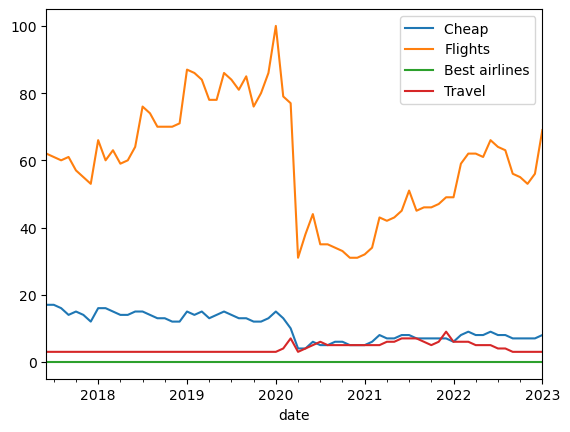

In [63]:
data_1 = pytrends_1.interest_over_time()
data_1.plot()

In [64]:
pytrends_2 = TrendReq(hl = 'en-US', tz=360)


In [65]:
kw_list = ["luggage", "luggage weight", "suitcase", "carry on", "precheck"]
pytrends_2.build_payload(kw_list, cat = 203 , timeframe = timeframe_for_analysis, geo="", gprop='')

<AxesSubplot:xlabel='date'>

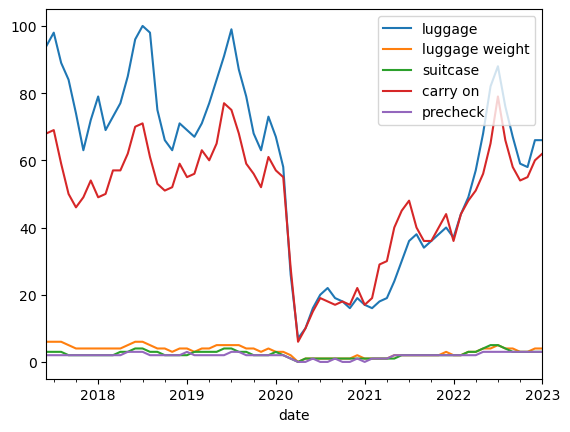

In [66]:
data_2 = pytrends_2.interest_over_time()
data_2.plot()

In [67]:
data_2.tail()

,luggage,luggage weight,suitcase,carry on,precheck,isPartial
date,,,,,,
2022-09-01,67,4,3,58,3,False
2022-10-01,59,3,3,54,3,False
2022-11-01,58,3,3,55,3,False
2022-12-01,66,4,3,60,3,False
2023-01-01,66,4,3,62,3,True


In [68]:
pytrends_3 = TrendReq(hl = 'en-US', tz=360)

In [69]:
kw_list = ["RV", "train", "bus", "car","road"]
pytrends_3.build_payload(kw_list, cat = 67 , timeframe = timeframe_for_analysis, geo="", gprop='')

<AxesSubplot:xlabel='date'>

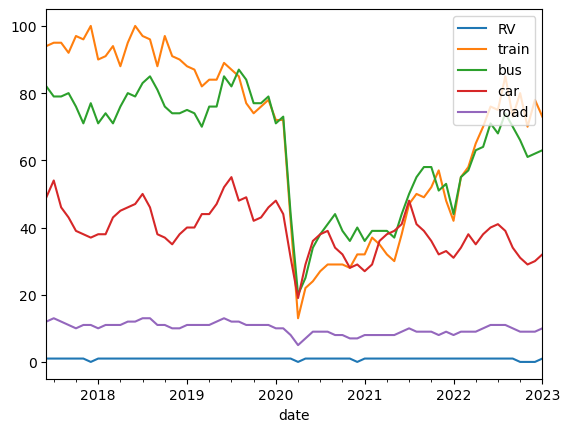

In [70]:
data_3 = pytrends_3.interest_over_time()
data_3.plot()

In [71]:
google_trends_data = pd.concat([data_1,data_2,data_3], axis = 1)


google_trends_data.drop(columns="isPartial", inplace = True)


google_trends_data=google_trends_data.resample('D', convention = 'start').ffill()
google_trends_data.head()

,Cheap,Flights,Best airlines,Travel,luggage,luggage weight,suitcase,carry on,precheck,RV,train,bus,car,road
date,,,,,,,,,,,,,,
2017-06-01,17,62,0,3,94,6,3,68,2,1,94,82,49,12
2017-06-02,17,62,0,3,94,6,3,68,2,1,94,82,49,12
2017-06-03,17,62,0,3,94,6,3,68,2,1,94,82,49,12
2017-06-04,17,62,0,3,94,6,3,68,2,1,94,82,49,12
2017-06-05,17,62,0,3,94,6,3,68,2,1,94,82,49,12


In [72]:
google_trends_data.tail()

,Cheap,Flights,Best airlines,Travel,luggage,luggage weight,suitcase,carry on,precheck,RV,train,bus,car,road
date,,,,,,,,,,,,,,
2022-12-28,7,56,0,3,66,4,3,60,3,0,78,62,30,9
2022-12-29,7,56,0,3,66,4,3,60,3,0,78,62,30,9
2022-12-30,7,56,0,3,66,4,3,60,3,0,78,62,30,9
2022-12-31,7,56,0,3,66,4,3,60,3,0,78,62,30,9
2023-01-01,8,69,0,3,66,4,3,62,3,1,73,63,32,10


In [73]:
data_path = Path("./google_data.csv")
google_trends_data.to_csv(data_path)